# 5장. 모델 평가와 성능 향상

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/05-model-evaluation-and-improvement.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/05-model-evaluation-and-improvement.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 코랩의 경우 다음 셀에서 나눔 폰트를 직접 설치합니다.

preamble.py > 한글폰트 처리 - 아래코드 불필요

In [134]:
%pip install koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


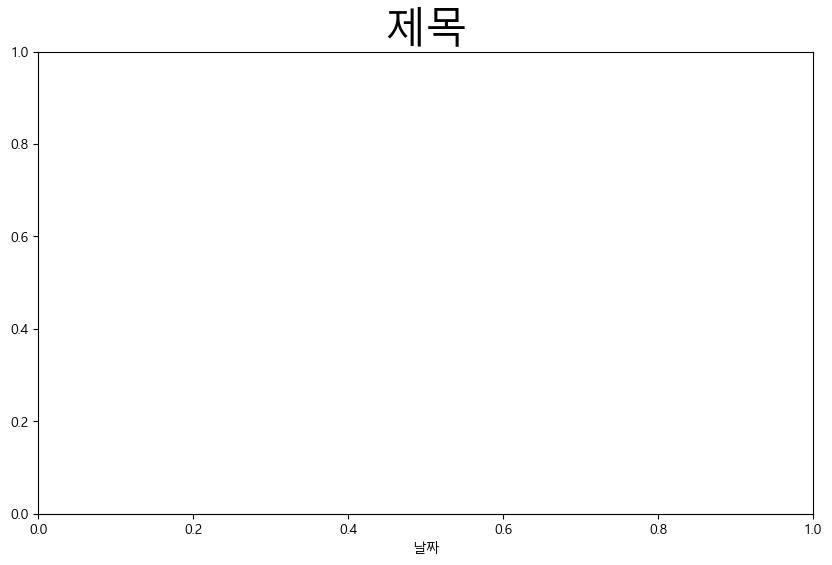

In [135]:
%matplotlib inline
import preamble
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

plt.figure(figsize=(10,6))
plt.title('제목', fontsize=30)
plt.xlabel('날짜', fontsize=10)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [136]:
%pip install -q --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [137]:
## 불필요
import os
import sys
if not os.path.isdir('mglearn'):
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

In [138]:
## 불필요
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules:
    # 사이킷런 최신 버전을 설치합니다.
    %pip install -q --upgrade scikit-learn
    if not os.path.isdir('mglearn'):
        # mglearn을 다운받고 압축을 풉니다.
        !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
        !tar -xzf mglearn.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [139]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #지도 학습 모델 평가를 위한 데이터 준비
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train) #모델 학습
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test))) # 모델 평가

테스트 세트 점수: 0.88


## 5.1 교차 검증

In [140]:
import mglearn
print(mglearn.__file__)

c:\CODE\머신러닝\intro_ml_with_python_2nd_revised-main\mglearn\__init__.py


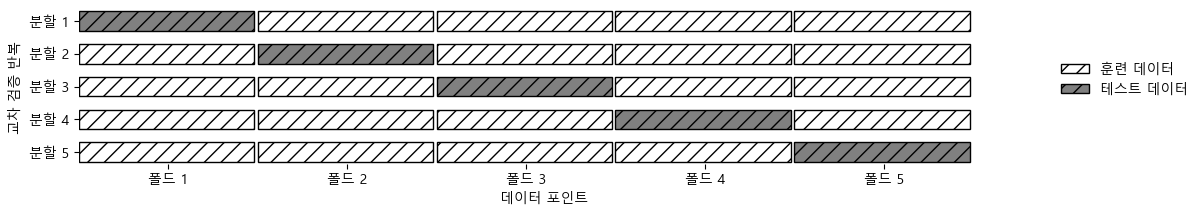

In [141]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target) #사이킷런의 교차 검증 함수
print("교차 검증 점수:", scores) #5-겹 교차 검증

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


cross_val_score는 모델 학습, 예측, 그리고 성능 평가를 모두 수행하는 함수:

데이터 분할:

1) cross_val_score는 입력 데이터(여기서는 iris.data와 iris.target)를 지정된 교차 검증 방식(기본값은 K-Fold, k=5)으로 나눈다
- 각 fold가 테스트 데이터로 사용되고 나머지는 학습 데이터로 사용됩니다.

모델 학습:

1) 각 fold에 대해, 주어진 모델(여기서는 LogisticRegression)이 학습 데이터로 학습.

모델 예측 및 성능 평가:

1) 학습된 모델은 테스트 데이터에서 예측을 수행.
- 지정된 평가 지표(기본값은 모델의 score 메서드, 보통 분류 문제에서는 정확도)를 사용하여 성능을 평가.

결과 반환:

1) 각 fold의 성능 점수를 계산한 후, 이를 리스트 형태로 반환.
- cross_val_score는 모델의 학습, 예측, 평가 프로세스를 자동으로 처리하여 각 fold의 성능 점수를 반환.

In [143]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10) # 10겹 교차 검증
print("교차 검증 점수:", scores)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


교재 342 페이지 > 100% 성능 > 모델이 훈련에 사용된 fold에 의존적이거나 데이터세트가 작아서 발생 

In [144]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [145]:
from sklearn.model_selection import cross_validate  ## 교차 검증에 함수를 사용하는 방식으로 학습시간, 테스트 시간을 반환 
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
res

{'fit_time': array([0.01 , 0.013, 0.01 , 0.01 , 0.011]),
 'score_time': array([0.001, 0.001, 0.   , 0.001, 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [146]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,1.00e-02,1.00e-03,0.97,0.97
1,1.30e-02,9.75e-04,1.00,0.97
2,1.00e-02,0.00e+00,0.93,0.98
3,1.00e-02,1.00e-03,0.97,0.98
4,1.10e-02,0.00e+00,1.00,0.97


평균 시간과 점수:
 fit_time       1.08e-02
score_time     5.96e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


### 5.1.2 교차 검증의 장점

P344 상단> 모델이 훈련 데이터에 민감

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [147]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


데이터세트를 k-fold로 나누는 것이 좋지 않을 때가 있다>P345 1st 문단

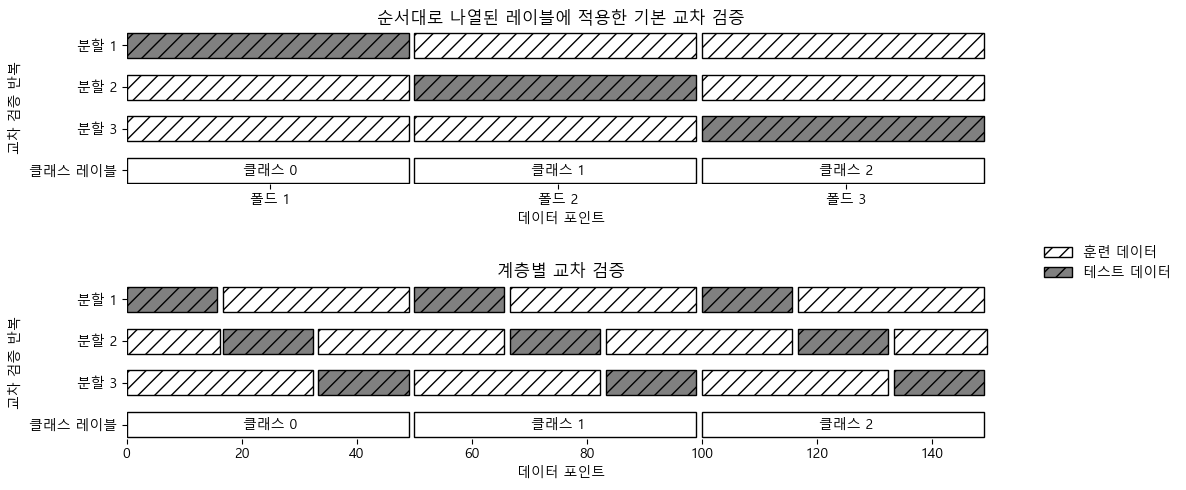

In [148]:
mglearn.plots.plot_stratified_cross_validation()

- stratify > build strata > strata: a dish that is made up of layers of bread, cheese, and meat 
>> 계층화된 번역이 이해안됨

- Stratified K-Fold Cross-Validation은 각 fold가 원본 데이터의 클래스 비율을 유지하도록 데이터를 나누는 방식

불균형 데이터 문제 해결:

- 데이터셋에서 특정 클래스의 샘플 수가 매우 적은 경우, 단순한 K-Fold에서는 어떤 fold에 특정 클래스가 전혀 포함되지 않을 수 있다.
 >  이 경우 모델이 특정 클래스에 대해 학습하지 못해 성능이 크게 저하.
- Stratified는 각 fold에 클래스 비율을 맞춰 이러한 문제를 방지.

#### 교차 검증 상세 옵션

In [149]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) # kfold는 객체

In [150]:
print(kfold)

KFold(n_splits=5, random_state=None, shuffle=False)


In [151]:
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))# cv 매개변수를 사용해 폴드의 갯수를 조정 

교차 검증 점수:
 [1.    1.    0.867 0.933 0.833]


In [152]:
kfold = KFold(n_splits=3) # 클래스가 3개인데 3-겹 교차 검증: 0점
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [153]:
import numpy as np
from sklearn.model_selection import KFold

# 예제 데이터
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])

# KFold 객체 생성 => shuffle를 사용하는 예
kfold = KFold(n_splits=3, shuffle=True, random_state=0) # shuffle를 사용

# 데이터셋을 나누고 각 폴드의 훈련셋과 테스트셋 인덱스를 출력
for train_index, test_index in kfold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) #인덱스 나눔
    X_train, X_test = X[train_index], X[test_index]
    print("X_train:", X_train, "X_test:", X_test)

TRAIN: [0 1 3 4] TEST: [2 5]
X_train: [[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]] X_test: [[ 5  6]
 [11 12]]
TRAIN: [0 2 4 5] TEST: [1 3]
X_train: [[ 1  2]
 [ 5  6]
 [ 9 10]
 [11 12]] X_test: [[3 4]
 [7 8]]
TRAIN: [1 2 3 5] TEST: [0 4]
X_train: [[ 3  4]
 [ 5  6]
 [ 7  8]
 [11 12]] X_test: [[ 1  2]
 [ 9 10]]


In [154]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) ## shuffle을 사용하는 경우
print("교차 검증 점수:\n",
    cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


#### LOOCV(Leave-One-Out cross-validation) - skip

In [155]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [156]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# LOOCV 객체 생성
loo = LeaveOneOut()

# 모델 생성
model = LogisticRegression(max_iter=200)

accuracies = []

# LOOCV 반복
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# LOOCV의 평균 정확도
average_accuracy = np.mean(accuracies)
print(f'Average accuracy with LOOCV: {average_accuracy:.4f}')

Average accuracy with LOOCV: 0.9667


#### 임의 분할 교차 검증 - skip

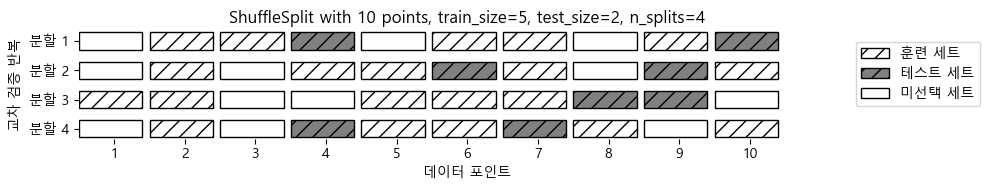

In [157]:
mglearn.plots.plot_shuffle_split()

In [158]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.4, train_size=.3, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.983 0.967 0.983 0.967 0.967 0.983 0.95  0.95  0.917 0.983]


#### 그룹별 교차 검증

- 일반적인 KFold는 데이터를 무작위로 나누기 때문에, 같은 그룹(예: 같은 사람, 같은 제품, 같은 회사 등)에 속한 데이터가 훈련 세트와 검증 세트에 동시에 포함될 경우의 문제
- 검증 정확도가 실제보다 과도하게 높게 나온다 → 데이터 누수(leakage) 발생.
- 교차 검증 시, 같은 그룹의 데이터는 훈련/검증 셋을 동시에 포함하지 않음



In [159]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75  0.6   0.667]


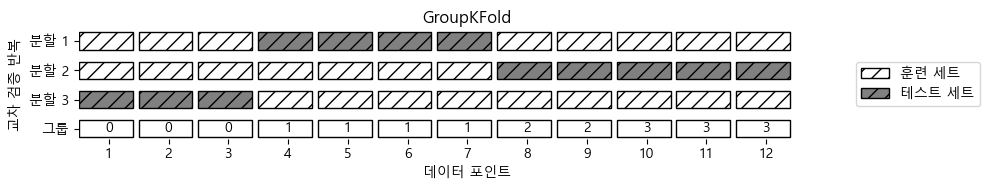

In [160]:
mglearn.plots.plot_group_kfold()

## 5.2 그리드 서치(Grid Search)

5.1절 교차 검증 > 모델의 일반화 성능을 측정

5.2절 grid search > 매개변수 튜닝하여 일반화 성능을 개선

### 5.2.1 간단한 그리드 서치

구글링: SVM 사용자로서 꼭 알아야 할 것들, ML Chang, 19.7.29., https://championprogram.tistory.com/282

SVM RBF(Radial Basis Function): 두 점 간의 유사도를 새로운 차원에서 그린다 - 가우시안 형태로 펼친다
- 두 점이 가까울수록 exp(-r||x1-x2||**2) 유사도 거리가 1에 가까워진다, 멀수록 0이 된다 
- 데이터 포인트 간의 유사도를 측정하여 가우시안 분포로 차원 증가시킨다

In [161]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합과 검증 세트

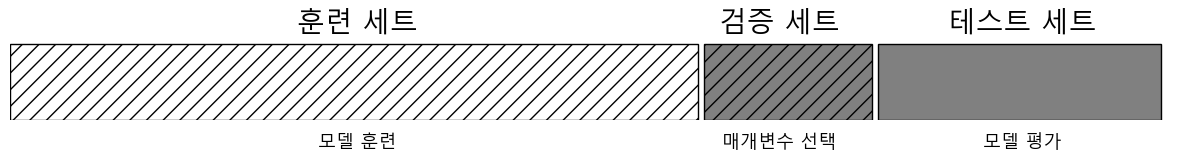

In [162]:
mglearn.plots.plot_threefold_split()

In [163]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


### 5.2.3 교차 검증을 사용한 그리드 서치

In [164]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

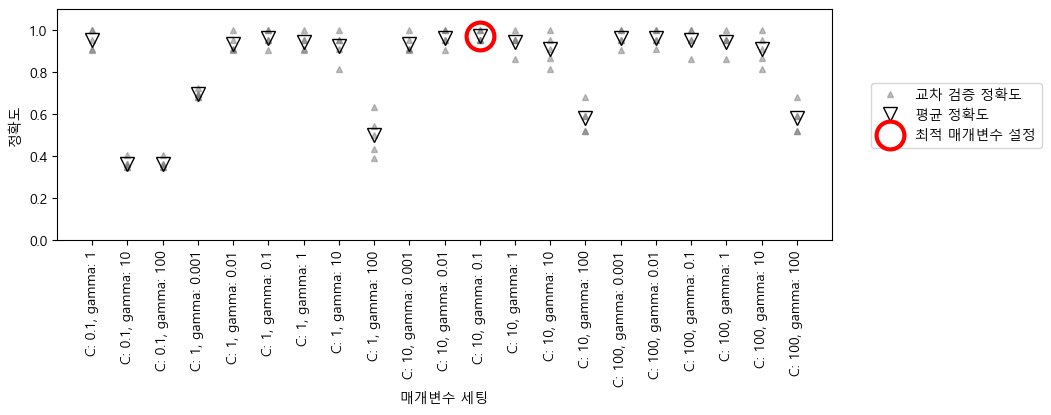

In [165]:
mglearn.plots.plot_cross_val_selection()

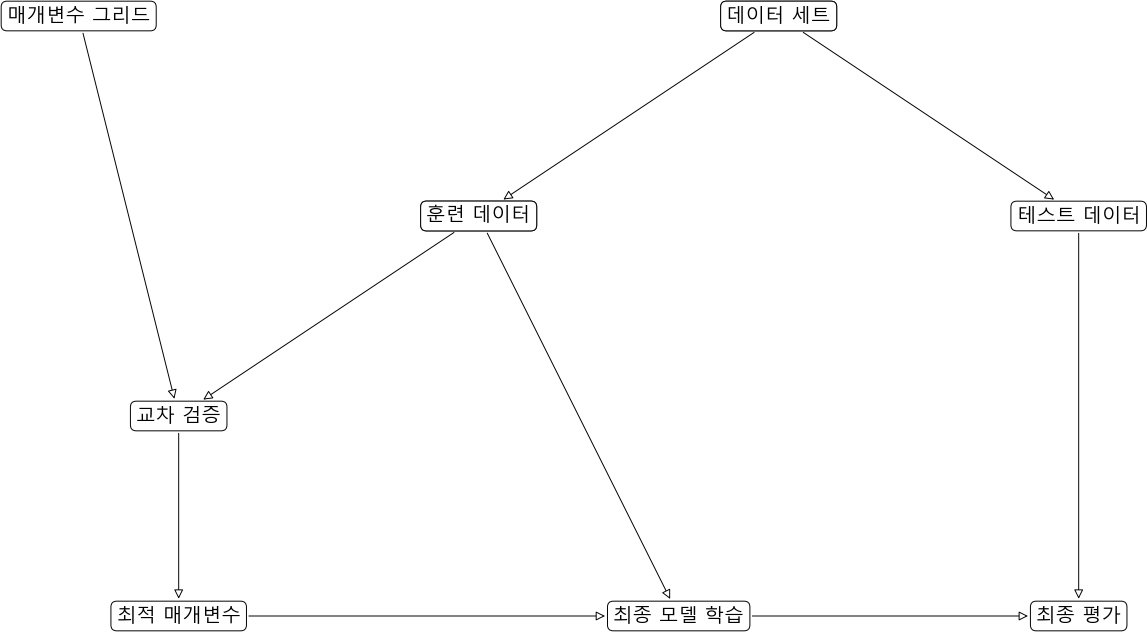

In [166]:
mglearn.plots.plot_grid_search_overview()

In [167]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) # GridSearchCV() 함수가 하는 일을 이해해야 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [170]:
grid_search.fit(X_train, y_train) ## fit()가 하는 일을 이해해야 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [171]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [172]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [173]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


#### 교차 검증 결과 분석-skip

In [174]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0
param_gamma,0.0,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


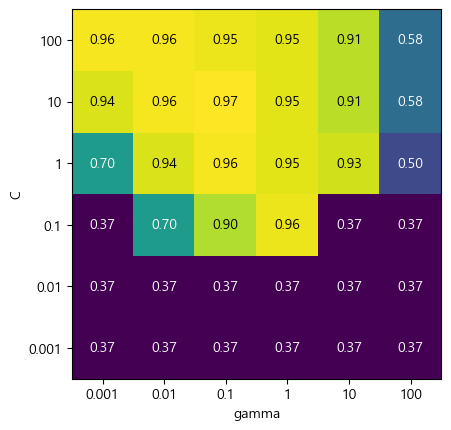

In [175]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show() # 책에는 없음

In [176]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


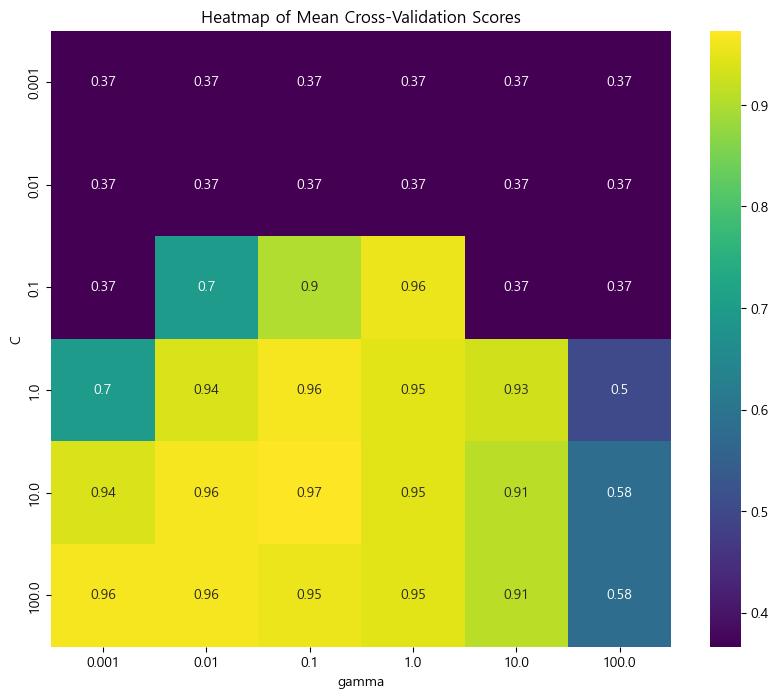

In [177]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 교차 검증 평균 점수 배열
scores = np.array(results.mean_test_score).reshape(6, 6)

# 히트맵을 그리기 위한 데이터프레임 생성
import pandas as pd

heatmap_data = pd.DataFrame(scores, 
                            index=param_grid['C'], 
                            columns=param_grid['gamma'])

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Heatmap of Mean Cross-Validation Scores')
plt.show()

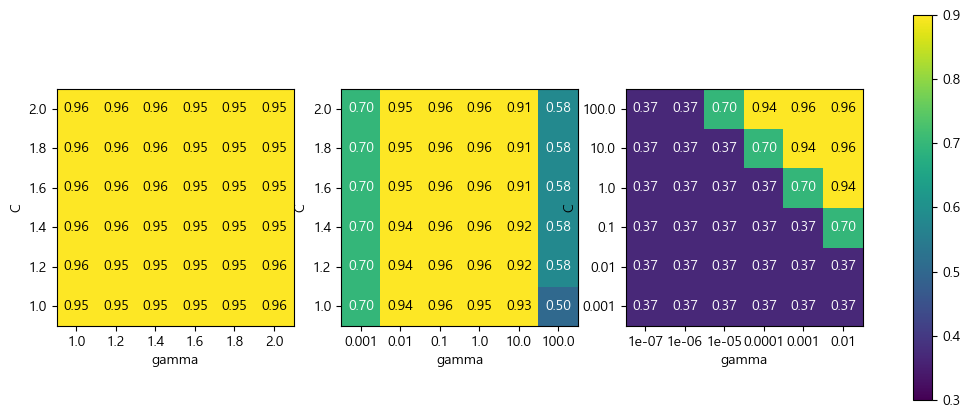

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)

plt.colorbar(scores_image, ax=axes.tolist())
plt.show() # 책에는 없음

 mglearn.tools.heatmap 함수에서 발생하며, ax.text 메서드가 배열이 아닌 단일 값(스칼라)을 기대하는 부분에서 발생합니다.

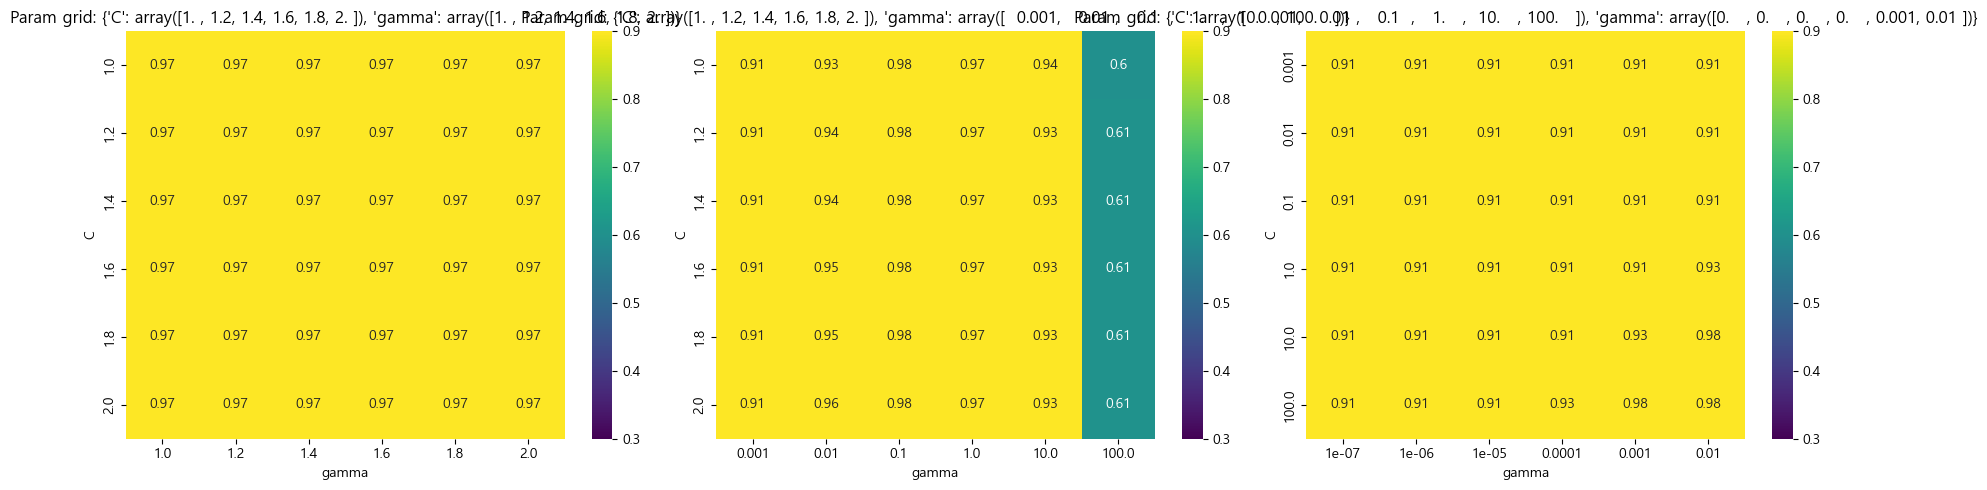

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# 예제 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

# 세 개의 다른 파라미터 그리드 설정
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X, y)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # seaborn을 사용한 히트맵 그리기
    sns.heatmap(scores, annot=True, cmap="viridis", ax=ax, vmin=0.3, vmax=0.9,
                xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')
    ax.set_title(f'Param grid: {param_grid}')

plt.tight_layout()
plt.show()

#### 비대칭 매개변수 그리드 탐색

In [180]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [181]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [182]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.0,0.01,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,1.0,0.35,0.35,0.7,0.91,1.0,0.96,0.91,0.39,0.91,1.0,1.0,0.96,0.87,0.52,1.0,1.0,1.0,0.96,0.87,0.52,0.35,0.87,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,0.91,0.35,0.35,0.7,0.91,0.96,0.91,0.96,0.43,0.91,0.96,0.96,0.96,0.91,0.52,0.96,0.91,0.96,0.96,0.91,0.52,0.35,0.87,0.91,0.96,1.0,0.96


#### 그리드 서치에 다양한 교차 검증 적용

#### 중첩 교차 검증

In [183]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


In [184]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [185]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


#### 교차 검증과 그리드 서치 병렬화

#### RandomizedSearchCV

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = [{'kernel': ['rbf'],
               'C': loguniform(0.001, 100),
               'gamma': loguniform(0.001, 100)},
              {'kernel': ['linear'],
               'C': loguniform(0.001, 100)}]

In [187]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20,
                                 random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)
print("최적 파라미터:", rand_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(rand_search.best_score_))

Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\CODE\머신러닝\.venv\lib\site-packages\joblib\externals\loky\process_executor.py", line 453, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\user\AppData\Local\Programs\Python\Python39\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute '_passthrough_scorer' on <module 'sklearn.metrics._scorer' from 'c:\\CODE\\머신러닝\\.venv\\lib\\site-packages\\sklearn\\metrics\\_scorer.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_11620\944303625.py", line 3, in <module>
    rand_search.fit(X_train, y_train)
  Fil

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1,
                                  random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)
print()
print("최적 파라미터:", halv_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

최적 파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [ ]:
print('자원 리스트:', halv_search.n_resources_)
print('후보 리스트:', halv_search.n_candidates_)

자원 리스트: [30, 90]
후보 리스트: [42, 14]


## 5.3 평가 지표 및 측정
### 5.3.1 최종 목표를 기억하라

### 5.3.2 이진 분류의 평가 지표
##### 에러의 종류
##### 불균형 데이터셋

In [203]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [207]:
%pip uninstall scikit-learn -y
%pip install scikit-learn==1.2.2

Found existing installation: scikit-learn 1.6.1Note: you may need to restart the kernel to use updated packages.

Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [208]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [209]:
import sklearn

print(sklearn.__version__)

1.2.2


In [210]:
from sklearn.dummy import DummyClassifier

In [213]:

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [214]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [215]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


##### 오차 행렬(Confusion matrices)

In [216]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


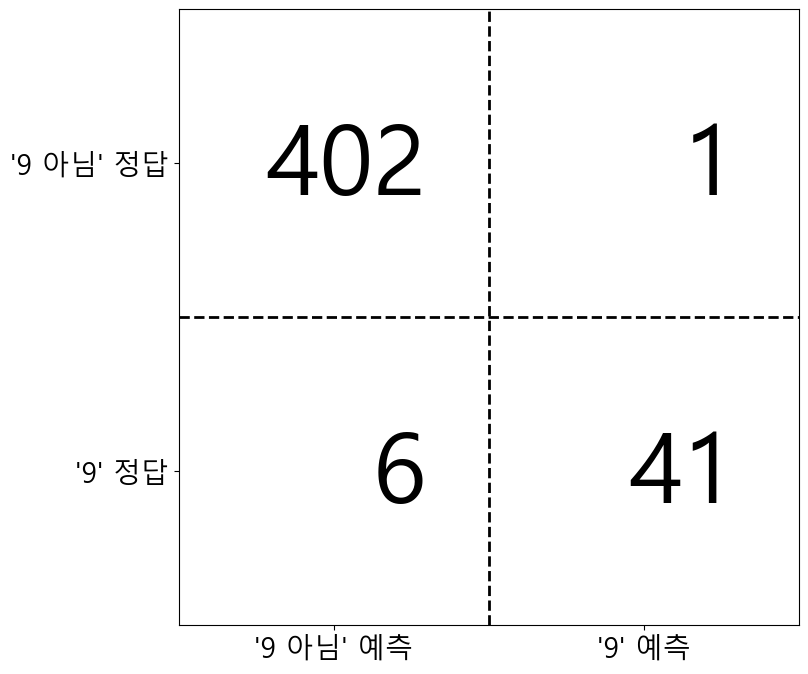

In [217]:
mglearn.plots.plot_confusion_matrix_illustration()

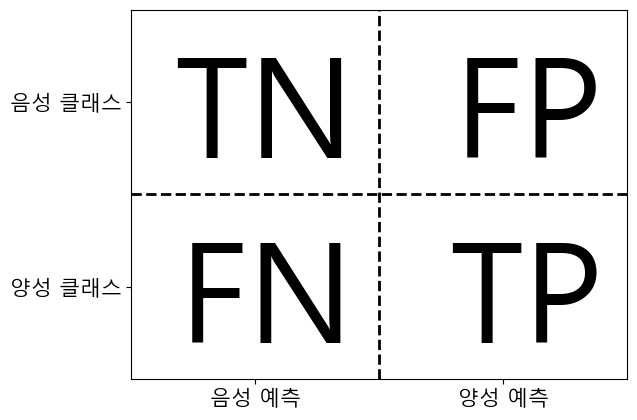

In [218]:
mglearn.plots.plot_binary_confusion_matrix()

In [219]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[358  45]
 [ 39   8]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


#### ConfusionMatrixDisplay

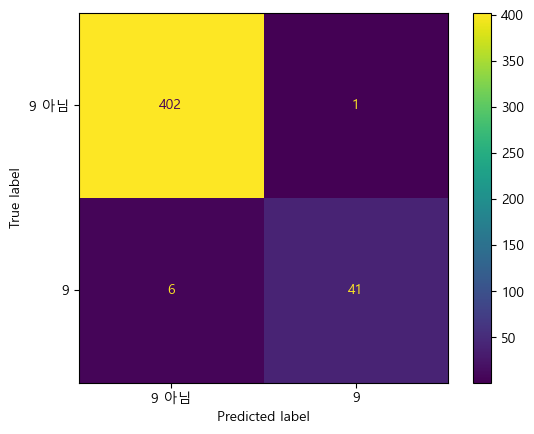

In [220]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test,
                                      display_labels=['9 아님', '9'])
plt.show()

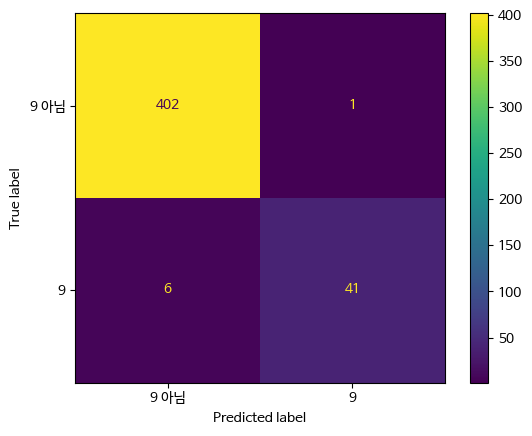

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg,
                                      display_labels=['9 아님', '9'])
plt.show()

###### 정확도와의 관계
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

###### 정밀도, 재현율, f-점수
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [ ]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.06
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [ ]:
from sklearn.metrics import classification_report
# 0 나눗셈 경고를 피하기 위해 zero_division 매개변수를 0으로 지정합니다.
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [ ]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.89      0.89       403
           9       0.07      0.06      0.06        47

    accuracy                           0.81       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.80      0.81      0.81       450



In [ ]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



#### 불확실성 고려

In [ ]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

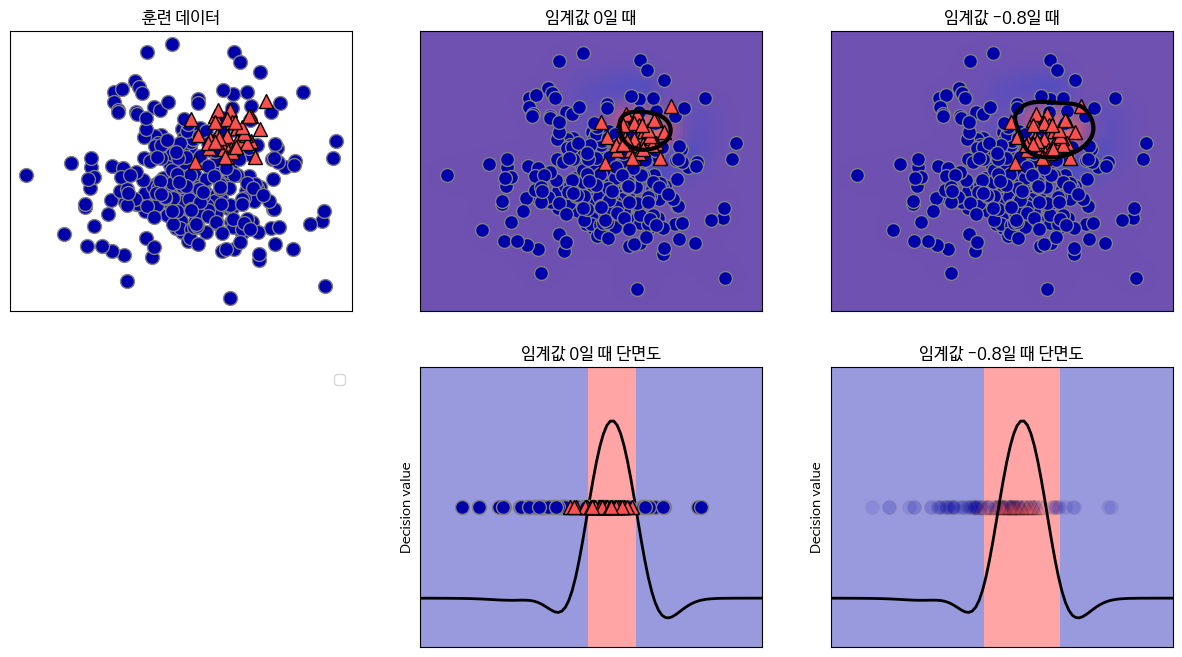

In [ ]:
mglearn.plots.plot_decision_threshold()

In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [ ]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



#### 정밀도-재현율 곡선과 ROC 곡선

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

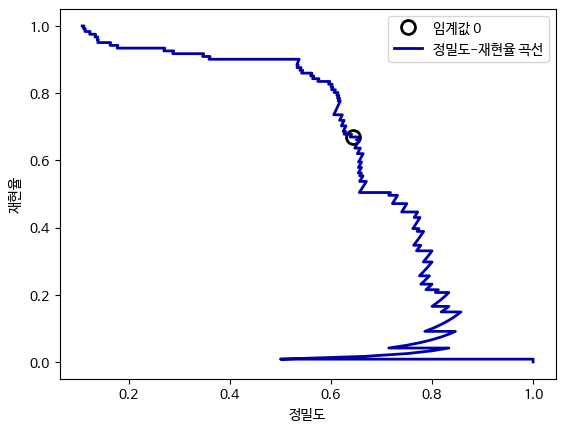

In [ ]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

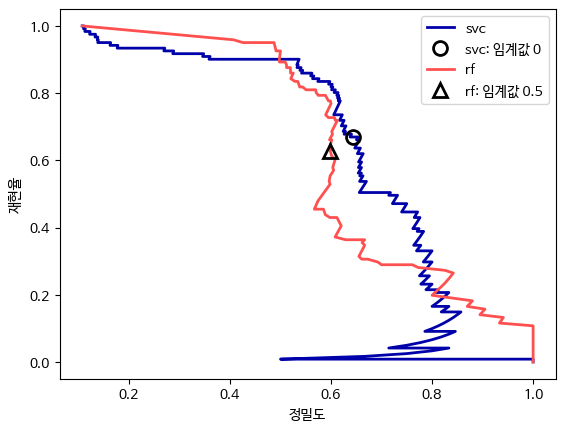

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [ ]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


#### PrecisionRecallDisplay

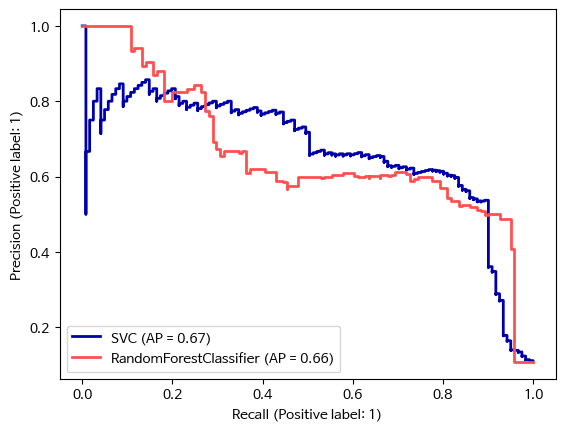

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

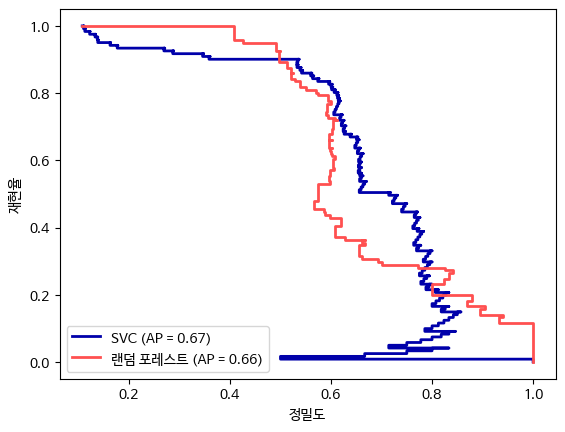

In [ ]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall, recall=precision,
                              average_precision=ap_svc,
                              estimator_name='SVC')
disp.plot(ax=ax)
# 랜덤 포레스트 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf,
                              average_precision=ap_rf,
                              estimator_name='랜덤 포레스트')
disp.plot(ax=ax)
ax.set(xlabel='정밀도', ylabel='재현율')
plt.show()

#### ROC 와 AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

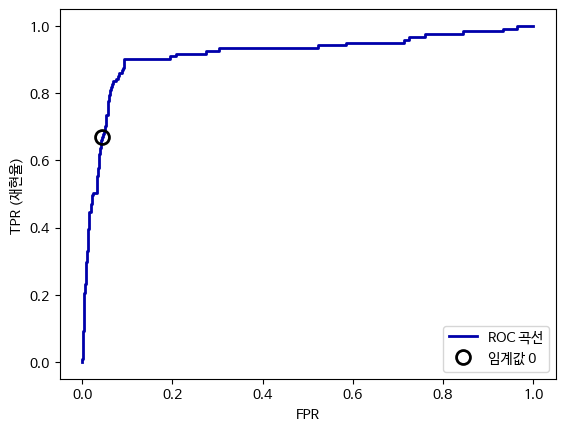

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show() # 책에는 없음

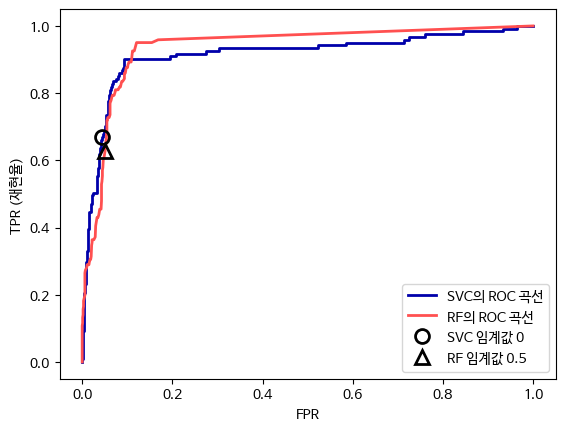

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.show() # 책에는 없음

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


#### RocCurveDisplay

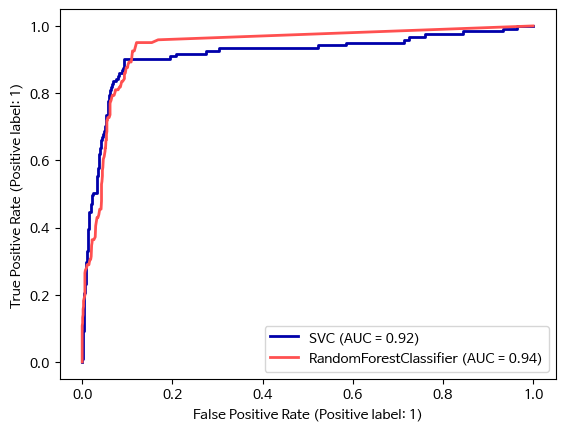

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

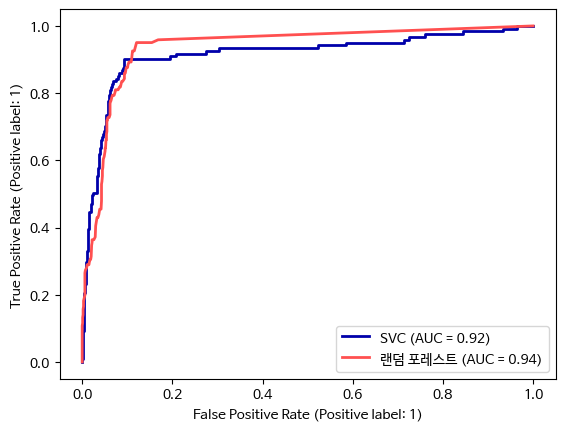

In [ ]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test),
                                 name='SVC', ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1],
                                 name='랜덤 포레스트', ax=ax)
plt.show()

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


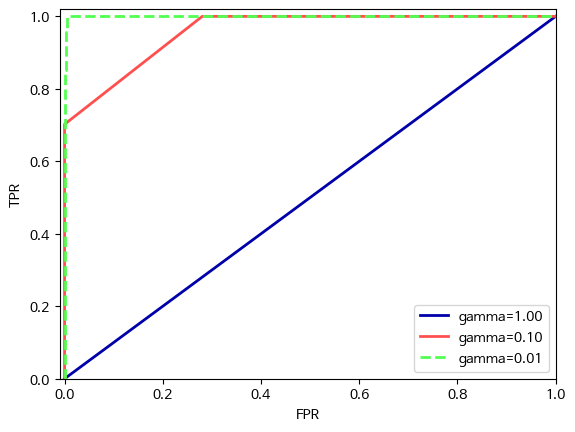

In [ ]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show() # 책에는 없음

### 5.3.3 다중 분류의 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


TypeError: %d format: a real number is required, not MaskedArray

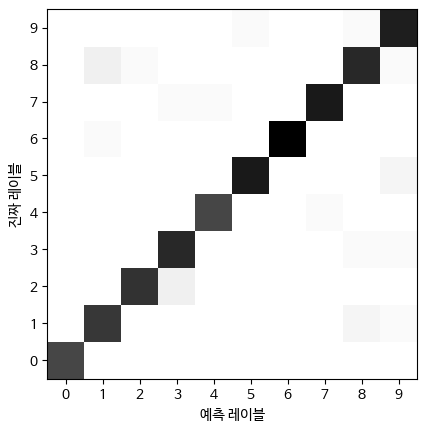

In [ ]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()

TypeError: %d format: a real number is required, not MaskedArray

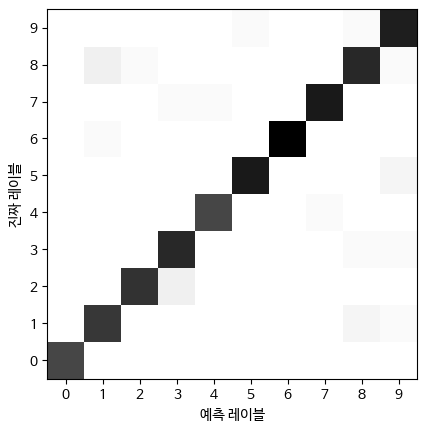

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import mglearn
import numpy as np

# Assuming y_test and pred are already defined
# Converting the confusion matrix values to integers
conf_matrix = confusion_matrix(y_test, pred).astype(int)

# Generating the heatmap
scores_image = mglearn.tools.heatmap(
    conf_matrix, xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d"
)
plt.title("오차 행렬")
plt.gca().invert_yaxis()
plt.show()

TypeError: %d format: a real number is required, not MaskedArray

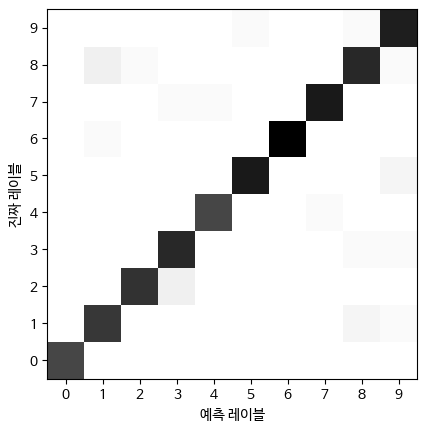

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import mglearn
import numpy as np
from sklearn.datasets import load_digits

# Load example data
digits = load_digits()
# Assuming y_test and pred are already defined, if not, create them using a train-test split
# Example using a simple train-test split and a classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Converting the confusion matrix values to integers
conf_matrix = confusion_matrix(y_test, pred).astype(int)

# Generating the heatmap
scores_image = mglearn.tools.heatmap(
    conf_matrix, xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d"
)
plt.title("오차 행렬")
plt.gca().invert_yaxis()
plt.show()

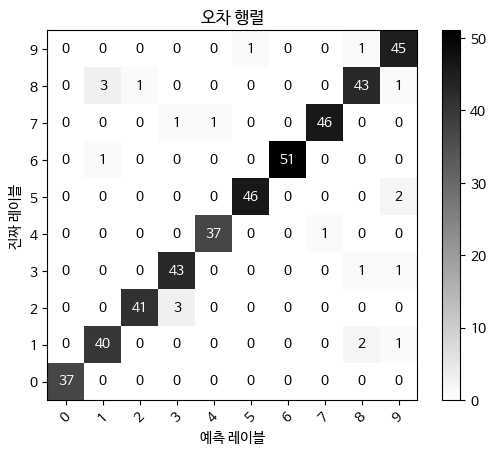

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load example data
digits = load_digits()

# Example using a simple train-test split and a classifier
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Converting the confusion matrix values to integers
conf_matrix = confusion_matrix(y_test, pred).astype(int)

# Create the heatmap using matplotlib directly
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.gray_r)
plt.title("오차 행렬")
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names, rotation=45)
plt.yticks(tick_marks, digits.target_names)

# Adding text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], "d"),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('진짜 레이블')
plt.xlabel('예측 레이블')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀 평가 지표

### 5.3.5 모델 선택에서 평가 지표 사용하기

In [ ]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]


In [ ]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.02,0.02,0.97,0.99,0.98,0.99,0.89,0.97
1,0.02,0.01,0.99,1.00,0.99,1.00,0.96,0.98
2,0.02,0.02,1.00,1.00,1.00,1.00,1.00,0.98
3,0.02,0.02,0.99,1.00,1.00,1.00,0.97,0.98
4,0.02,0.02,0.98,1.00,0.95,1.00,0.90,0.99


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [ ]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896


## 5.4 요약 및 정리

In [ ]:
#실습과제 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import mglearn

# 데이터셋 로드
X, y = mglearn.datasets.load_extended_boston()

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Ridge 회귀 모델 정의
ridge = Ridge()

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성 (교차 검증은 기본 5-폴드 사용)
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 매개변수와 성능 출력
print("최적의 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수 (MSE): {:.2f}".format(-grid_search.best_score_))

# 테스트 세트에서 성능 평가
test_score = grid_search.score(X_test, y_test)
print("테스트 세트 점수 (MSE): {:.2f}".format(-test_score))

2,3,4장 반복 구현하는 실습 
2장 마친후 실습할 과제를 만드는 것이 필요
3장 마친후 실습할 과제를 만드는 것이 필요 > 교재 코드 설명만 하니 잘 이해를 못한다 > 개선이 필요- 24.7.22일  